# 심부전증분류예측
- kaggle에서 제공하는 데이터셋을 이용하여 분류 데이터 EDA와 분류분석을 실행하여 모델을 제작

## Step 1. 데이터 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/igksj/Desktop/분반 자료/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.columns.unique()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

## Step2. EDA 및 데이터 기초 통계 분석

In [4]:
# 데이터 각 column의 타입 확인
# 1[빈혈], 3[당뇨], 5[혈압여부], 9[성별], 10[흡연여부], 12[사망여부]는 범주형 데이터셋임.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
# nan 데이터 유무 확인
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
# 범주형, 수치형 데이터 확인 및 
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<AxesSubplot:>

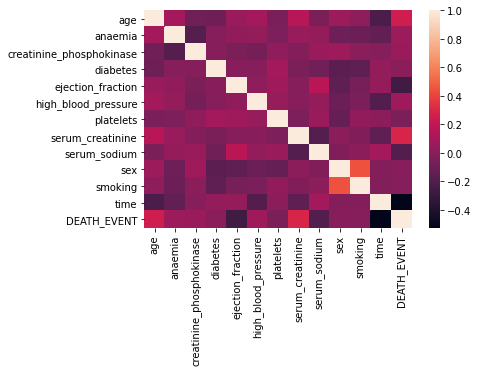

In [9]:
sns.heatmap(df.corr(),annot=False)

## 수치형 데이터의 히스토그램

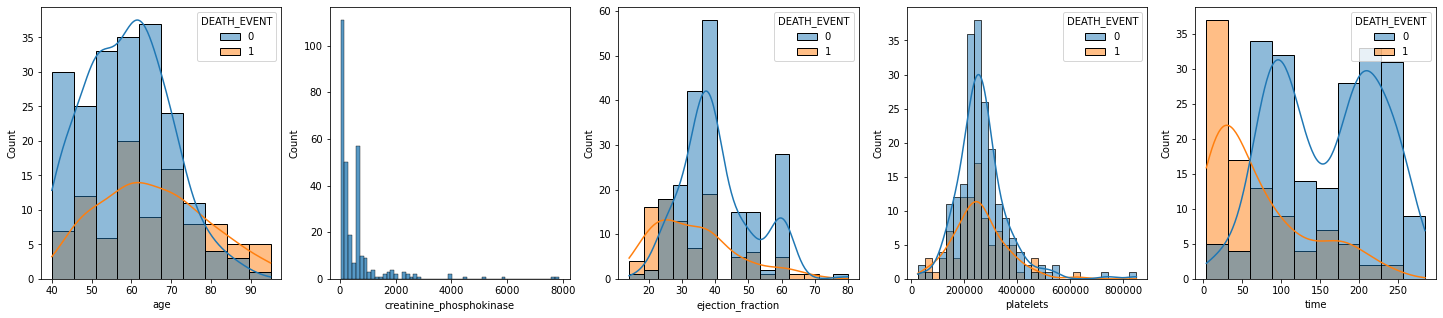

In [10]:
f,ax=plt.subplots(1,5,figsize=(25,5))

sns.histplot(x='age',data=df,hue='DEATH_EVENT',kde=True,ax=ax[0])
sns.histplot(x='creatinine_phosphokinase',data=df,ax=ax[1])
sns.histplot(x='ejection_fraction',hue='DEATH_EVENT',kde=True,data=df,ax=ax[2])
sns.histplot(x='platelets',data=df,hue='DEATH_EVENT',kde=True,ax=ax[3])
sns.histplot(x='time',data=df,hue='DEATH_EVENT',kde=True,ax=ax[4])
plt.show()
plt.close()

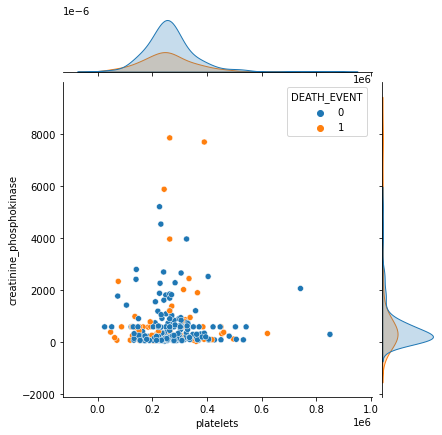

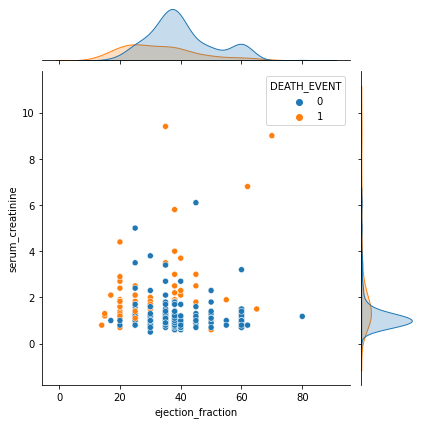

In [15]:
sns.jointplot(x=df['platelets'],y=df['creatinine_phosphokinase'],hue=df['DEATH_EVENT'],kind='scatter')
sns.jointplot(x=df['ejection_fraction'],y=df['serum_creatinine'],kind='scatter',hue=df['DEATH_EVENT'])

C:\Users\igksj\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


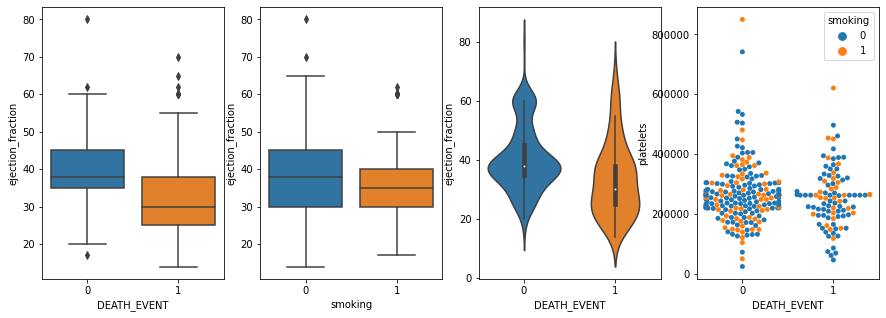

In [48]:
# seaborn의 Boxplot 계열(boxplot(), violinplot(), swarmplot())을 사용
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
sns.boxplot(x='DEATH_EVENT',y='ejection_fraction',data=df)
plt.subplot(1,4,2)
sns.boxplot(x='smoking',y='ejection_fraction',data=df)
plt.subplot(1,4,3)
sns.violinplot(data=df,x='DEATH_EVENT',y='ejection_fraction')
plt.subplot(1,4,4)
sns.swarmplot(data=df,x='DEATH_EVENT',y='platelets',hue='smoking')
plt.show()
plt.close()

## Step3. 모델 학습을 위한 데이터 전처리

### StandardScaler를 이용하여 데이터 전처리

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
X_num = df[['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df['DEATH_EVENT']

In [19]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler =StandardScaler()
scaler.fit(X_num)
X_scale=scaler.transform(X_num)

# 스케일링된 데이터셋을 데이터프레임으로 만들고  범주형자료만 별도로 띄어낸 X_cat과 합쳐서 한개의 데이터 프레임을 제작
X_scale1=pd.DataFrame(data=X_scale,index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scale1, X_cat], axis=1)
X

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.537688,-0.007077,-1.109765e+00,-0.284552,1.447094,0,1,1,1,1
295,-0.491279,1.278215,-0.007077,6.802472e-02,-0.187726,0.539054,0,0,0,0,0
296,-1.333392,1.525979,1.854958,4.902082e+00,-0.575031,0.312044,0,1,0,0,0
297,-1.333392,1.890398,-0.007077,-1.263389e+00,0.005926,0.766064,0,0,0,1,1


- 문제 : 학습데이터와 테스트데이터 분리하기

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# 학습데이터와 테스트 데이터 분리 (test data는 30%로 설정)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## Step4. Classification 모델 학습하기

- 문제 9. Logistic Regression 모델 생성/학습

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
np.unique(y)

array([0, 1], dtype=int64)

In [24]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression() # 옵션 없이 진행
model_lr.fit(X_train,y_train)

LogisticRegression()

### 모델 학습 결과 평가

In [25]:
from sklearn.metrics import classification_report

In [26]:
y_predict = model_lr.predict(X_test)

In [27]:
from sklearn.linear_model import SGDClassifier
model_sg = SGDClassifier(random_state=3224)

In [28]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(model_sg, X_train, y_train, cv=3)
cf = confusion_matrix(y_train,y_train_pred)
print(cf)

[[101  38]
 [ 40  30]]


In [29]:
# 1값이 예측이 잘안되니 1값만 꺼내 예측이 안맞는 것을 확인
cnt = 0
tmplist = []
for i, j in zip(y_test,y_predict):
    if i == j:
        tmplist.append({'y':i,'pred':j, 'result':'O'})
    else:
        tmplist.append({'y':i,'pred':j, 'result':'X'})

In [30]:
tmp=pd.DataFrame(tmplist)
tmp.head()

,y,pred,result
0,0,0,O
1,0,0,O
2,1,0,X
3,0,0,O
4,0,0,O


In [31]:
indexList = tmp[(tmp['y'] ==1)&(tmp['result']=='X')].index
indexList

Int64Index([2, 8, 12, 14, 21, 45, 48, 49, 64, 65, 69, 72, 79, 82, 84, 86, 89], dtype='int64')

In [32]:
# Predict를 수행하고 classification_report() 결과 출력하기
# 정밀도(Precision): True라 분류한 것 중 실제 True인 것의 비율
# 재현율(Recall): 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율
# F1-score: 정밀도와 재현율의 조화평균(2*(precision*recall)/(precision+recall))
# 0값에 대한 정밀도 재현율 등이 좋은 결과값이 나왔지만 1값에 대한 재현율이 매우 낮게 나옴
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        64
           1       0.64      0.35      0.45        26

    accuracy                           0.76        90
   macro avg       0.71      0.63      0.65        90
weighted avg       0.74      0.76      0.73        90



### XGBoost 모델 생성/학습

In [33]:
from xgboost import XGBClassifier

In [35]:
# XGBClassifier 모델 생성/학습
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

[09:02:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\igksj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### 문제 12. 모델 학습 결과 평가하기

In [36]:
# Predict를 수행하고 classification_report() 결과 출력하기
# 정밀도(Precision): True라 분류한 것 중 실제 True인 것의 비율
# 재현율(Recall): 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율
# F1-score: 정밀도와 재현율의 조화평균(2*(precision*recall)/(precision+recall)) 성능을 하나의 숫자로 표현할 수 있음
# LogisticRegression의 결과보단 1값의 재현율이 높지만 좋은 성능이라고 할 수 없음(옵션을 설정할 필요가 있어보임)
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        64
           1       0.62      0.50      0.55        26

    accuracy                           0.77        90
   macro avg       0.72      0.69      0.70        90
weighted avg       0.76      0.77      0.76        90



### 문제 13. 특징의 중요도 확인

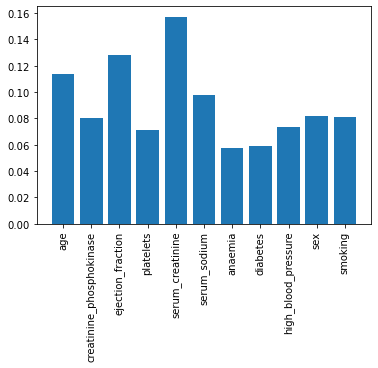

In [37]:
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

## Step 5. 모델 학습 결과 심화 분석

- 문제 14. Precision-Recall 커브 확인하기

In [38]:
from sklearn.metrics import plot_precision_recall_curve

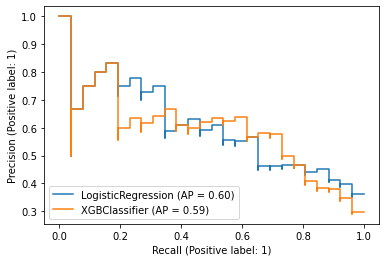

In [39]:
# 두 모델의 Precision-Recall 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)

fig = plt.figure()
ax = fig.gca()
plot_precision_recall_curve(model_lr, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)

### 문제 15. ROC 커브 확인

In [40]:
from sklearn.metrics import plot_roc_curve

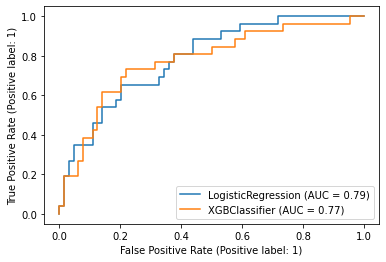

In [41]:
fig = plt.figure()
ax = fig.gca()
plot_roc_curve(model_lr, X_test, y_test, ax=ax)
plot_roc_curve(model_xgb, X_test, y_test, ax=ax)

### 혼돈행렬

In [43]:
from sklearn.linear_model import SGDClassifier
model_sg = SGDClassifier(random_state=3224)

In [44]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(model_sg, X_train, y_train, cv=3)
cf = confusion_matrix(y_train,y_train_pred)
print(cf)

[[101  38]
 [ 40  30]]
